In [5]:
import cv2
import numpy as np
import pylab
name = 'data/1000 um 1k.png'

# Kmeans 
def kmeans_color_quantization(image, clusters=8, rounds=1):
    h, w = image.shape[:2]
    samples = np.zeros([h*w,3], dtype=np.float32)
    count = 0

    for x in range(h):
        for y in range(w):
            samples[count] = image[x][y]
            count += 1

    compactness, labels, centers = cv2.kmeans(samples,
            clusters, 
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10000, 0.0001), 
            rounds, 
            cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    return res.reshape((image.shape))

# Load image
image = cv2.imread(name)

height, width, _ = image.shape
scale = image[width:height, 0:width]
img = image[0:width, 0:width]

original = image.copy()

# Perform kmeans color segmentation, grayscale, Otsu's threshold
kmeans = kmeans_color_quantization(image, clusters=2)
gray = cv2.cvtColor(kmeans, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Find contours, remove tiny specs using contour area filtering, gather points
points_list = []
size_list = []
cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
AREA_THRESHOLD = 2
for c in cnts:
    area = cv2.contourArea(c)
    if area < AREA_THRESHOLD:
        cv2.drawContours(thresh, [c], -1, 0, -1)
    else:
        (x, y), radius = cv2.minEnclosingCircle(c)
        points_list.append((int(x), int(y)))
        size_list.append(area)

# Apply mask onto original image
result = cv2.bitwise_and(original, original, mask=thresh)
result[thresh==255] = (36,255,12)

# Overlay on original
original[thresh==255] = (36,255,12)

print("Number of particles: {}".format((points_list)))
print("Average particle size: {:.3f}".format(sum(size_list)/len(size_list)))
print(size_list)

# Display
cv2.imshow('kmeans', kmeans)
# cv2.imshow('original', original)
# cv2.imshow('thresh', thresh)
# cv2.imshow('result', result)
cv2.waitKey(0)

Number of particles: [(556, 1022), (222, 1021), (689, 1020), (816, 1020), (70, 1019), (836, 1016), (490, 1016), (611, 1017), (534, 1017), (241, 1017), (61, 1017), (561, 1015), (112, 1014), (511, 1014), (749, 1013), (503, 1006), (200, 1006), (859, 1009), (723, 1004), (576, 1004), (97, 1004), (667, 1007), (61, 1003), (33, 1001), (245, 999), (69, 999), (768, 996), (402, 1003), (122, 999), (33, 997), (879, 995), (624, 999), (249, 994), (690, 996), (504, 996), (131, 992), (735, 998), (590, 992), (567, 995), (664, 991), (104, 990), (605, 991), (60, 990), (447, 988), (81, 991), (860, 985), (410, 983), (615, 986), (176, 999), (650, 986), (554, 979), (567, 982), (402, 979), (822, 979), (241, 976), (215, 979), (734, 976), (635, 974), (138, 974), (844, 972), (679, 975), (590, 971), (529, 971), (130, 972), (409, 973), (163, 971), (919, 969), (641, 967), (894, 966), (190, 970), (756, 966), (788, 965), (153, 966), (876, 969), (198, 964), (214, 961), (612, 962), (419, 961), (140, 962), (468, 982), (2

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread (0x302f5e0).
Cannot move to target thread (0x1831030)

QObject::moveToThread: Current thread (0x1831030) is not the object's thread

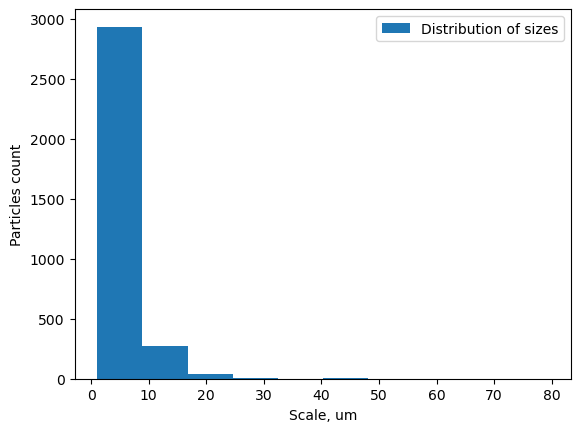

In [3]:
import matplotlib.pyplot as plt

x = [1, 1, 2, 3, 3, 5, 7, 8, 9, 10,
     10, 11, 11, 13, 13, 15, 16, 17, 18, 18,
     18, 19, 20, 21, 21, 23, 24, 24, 25, 25,
     25, 25, 26, 26, 26, 27, 27, 27, 27, 27,
     29, 30, 30, 31, 33, 34, 34, 34, 35, 36,
     36, 37, 37, 38, 38, 39, 40, 41, 41, 42,
     43, 44, 45, 45, 46, 47, 48, 48, 49, 50,
     51, 52, 53, 54, 55, 55, 56, 57, 58, 60,
     61, 63, 64, 65, 66, 68, 70, 71, 72, 74,
     75, 77, 81, 83, 84, 87, 89, 90, 90, 91
     ]
from numpy import genfromtxt
x = genfromtxt('task/200 (2)_sizes.csv', delimiter=',')

plt.hist(x)
plt.xlabel("Scale, um")
plt.ylabel("Particles count")
plt.legend(["Distribution of sizes"])
plt.show()